In [3]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# The following definition is a helper functions for plotting the results for ezch model

In [5]:
#-----------------Used for plotting purposes later--------------------------
def plot_decisionBoundary(X,Y,classifier,X_test = None,Y_test = None,save = False):
    #Get boundary box dimensions for the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   # markers = ('o','x')
    colors = ('hotpink','blue','lightgreen')
    colors2 = ('red','navy','green')
    markers = ('s','x','o')
    markers2 = ('+','^','*')
    #colors = ('red','blue','lightgreen','gray')
    cmap = ListedColormap(colors)
    cmap2 = ListedColormap(colors2)
    #Generate uniformly spaced points to get decision boundary
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    mesh_data = np.column_stack([xx.ravel(),yy.ravel()])
    boundary_data = classifier.predict(mesh_data)
    boundary_data = boundary_data.reshape(xx.shape)
    plt.contourf(xx, yy, boundary_data,cmap = cmap, alpha=0.5)
    sct1 = []
    sct2 = []
    predicted_train = classifier.predict(X)
    for idx, cl in enumerate(np.unique(Y)):
        sct1.append(plt.scatter(x=X[Y==cl,0], y = X[Y==cl,1],alpha = 0.6, c =cmap(idx),marker =markers[idx],label = "Training class: {}".format(cl)))
    plt.title("Decision Boundary")
    if(X_test is not None):
        predicted = classifier.predict(X_test)
        for idx, cl in enumerate(np.unique(Y_test)):
            sct2.append(plt.scatter(X_test[Y_test == cl,0],X_test[Y_test == cl,1],c=cmap2(idx),alpha=1.0,marker=markers2[idx], label = "Test class: {}".format(cl)))
    plt.legend(handles=sct1 + sct2,loc = 'best')
    if save:
        plt.savefig('../Slides/Images/kNN_DecisionBoundary')
    plt.show()
    err_train = np.sum(Y != predicted_train)
    err = np.sum(Y_test != predicted)
    M = Y.shape[0]
    N = Y_test.shape[0]
    print("Training Accuracy {:.2f}%, with {} out of  {} correctly classified.".format((1-err_train/M)*100,M-err_train,M))
    print("Test Accuracy {:.2f}%, with {} out of  {} correctly classified.".format((1-err/N)*100,N-err,N))

In [6]:
class kNN_Classifier(object):
    def __init__(self,k,X,Y):
        self.k = k
        self.X = X
        self.Y = Y
        self.n = self.X.shape[0]
    def getDistance(self,x):
        distances = []
        for i in range(self.n):
            distances.append(np.linalg.norm(self.X[i,:]-x, ord = 2))
        distances = np.array(distances)
        return distances,np.argsort(distances)
    def getPrediction(self,x):
        distances,index = self.getDistance(x)
        prediction = mode(self.Y[index[0:self.k]],axis=None)[0][0]
        return prediction
    def predict(self,X_test):
        m = X_test.shape[0]
        preds = []
        for i in range(m):
            preds.append(self.getPrediction(X_test[i,:]))
        return np.array(preds)

In [7]:
iris_dir = "C:/Users/Administrator/Desktop/数据科学导论/iris/iris.data"
iris_names = ['sepal length','sepal width','pedal length','pedal width','Iris Type']
data_types = {'sepal length':np.float32,'sepal width':np.float32,'pedal length':np.float32,'pedal width':np.float32,'Iris Type':np.str}
data = pd.read_csv(iris_dir,sep = ",",names = iris_names,dtype= data_types)

In [8]:
data.head

<bound method NDFrame.head of      sepal length  sepal width  pedal length  pedal width       Iris Type
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

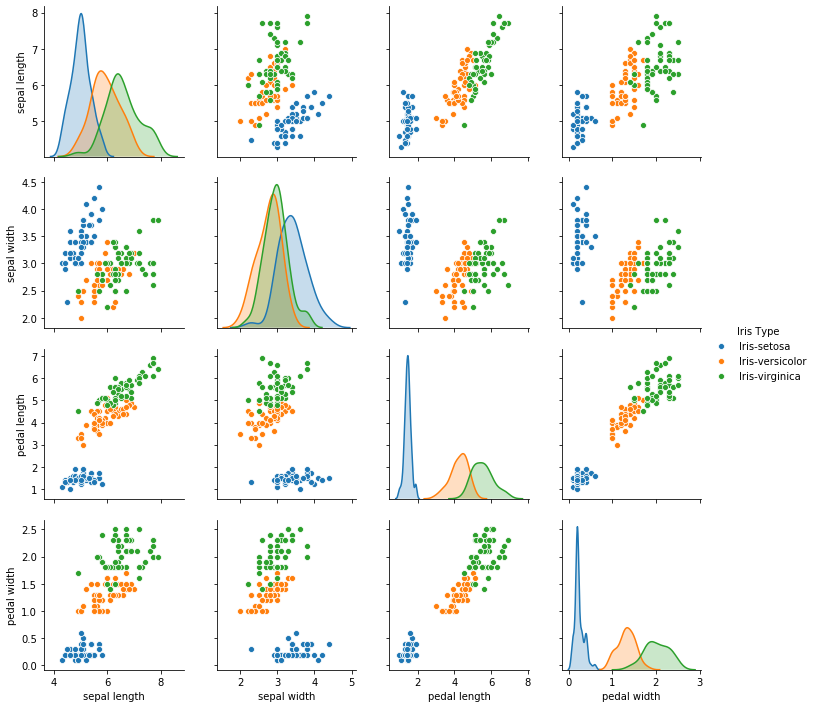

In [9]:
%matplotlib inline
import seaborn as sns
sns.pairplot(data,hue='Iris Type')

In [10]:
data_sepal = data[['sepal length','sepal width']].iloc[0:100]
iris_classes = pd.DataFrame({'Iris classes':pd.Categorical(data['Iris Type']).codes}).iloc[0:100]

In [11]:
iris_classes.head()

,Iris classes
0,0
1,0
2,0
3,0
4,0


In [12]:
X = data_sepal.as_matrix()
Y = iris_classes.as_matrix().ravel()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 123)

# For the two class iris problems we plot the decision boudary as k changes

---------Decision Boundary for k-NN Classifier for k = 1---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

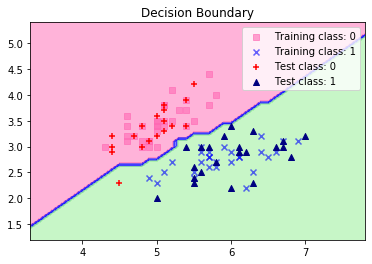

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 2---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

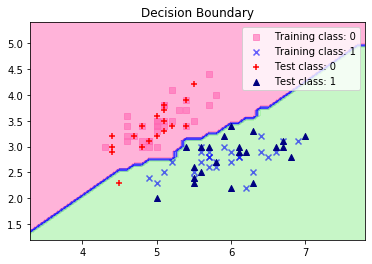

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 3---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

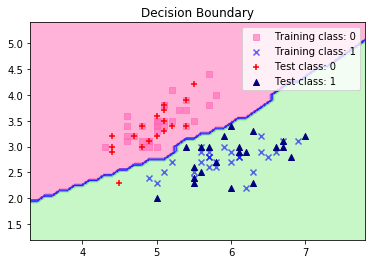

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 4---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

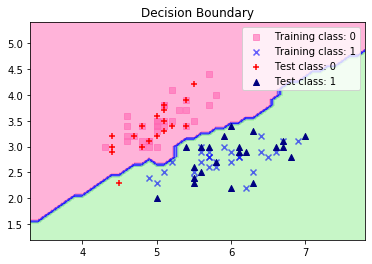

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 5---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

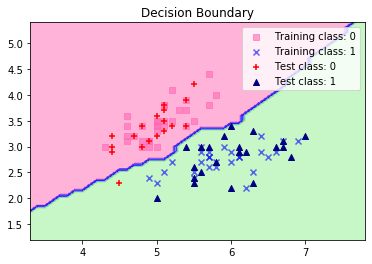

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 6---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

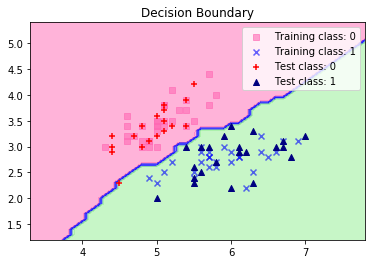

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 7---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

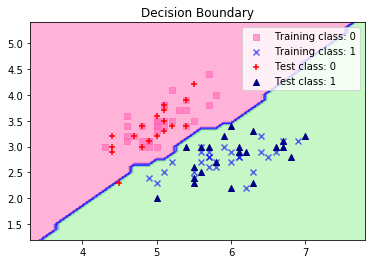

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 97.50%, with 39 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 8---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

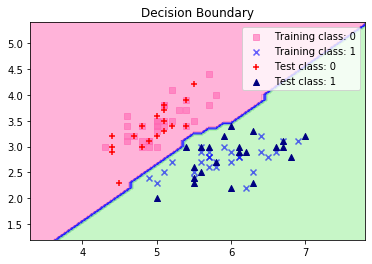

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 9---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

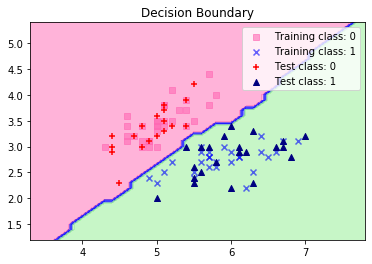

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 10---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

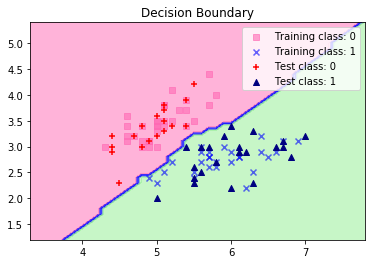

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 11---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

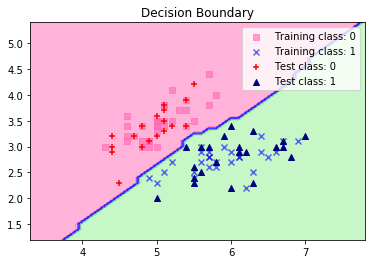

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 12---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

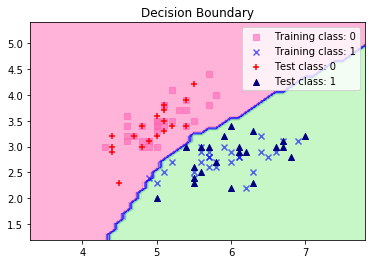

Training Accuracy 98.33%, with 59 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 13---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

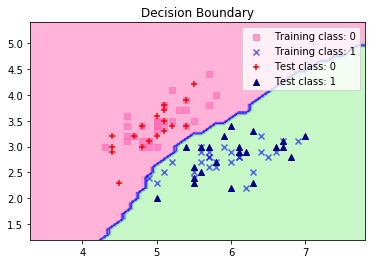

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 14---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

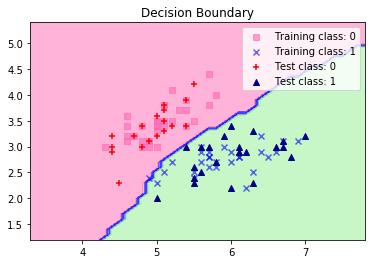

Training Accuracy 98.33%, with 59 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 15---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

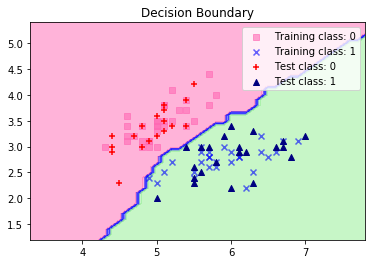

Training Accuracy 100.00%, with 60 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 16---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

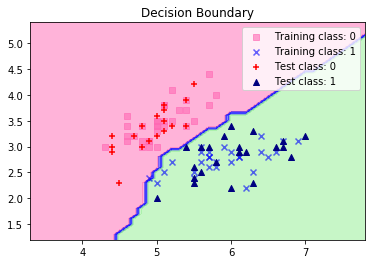

Training Accuracy 98.33%, with 59 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 17---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

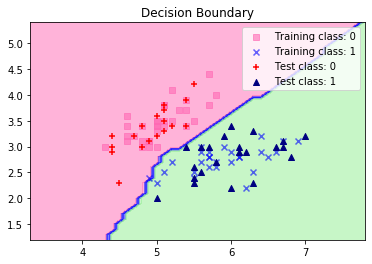

Training Accuracy 98.33%, with 59 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 18---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

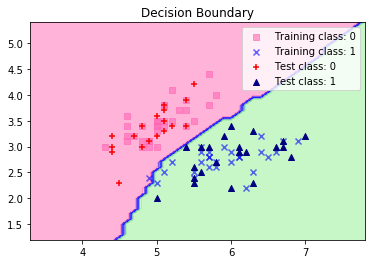

Training Accuracy 98.33%, with 59 out of  60 correctly classified.
Test Accuracy 100.00%, with 40 out of  40 correctly classified.


In [14]:
for k in range(1,19):
    print("---------Decision Boundary for k-NN Classifier for k = {}---------".format(k))
    kNN = kNN_Classifier(k,X_train,Y_train)
    plot_decisionBoundary(X_train,Y_train,kNN,X_test=X_test,Y_test=Y_test,save= False)

# Now we explore all 3 classes

In [15]:
iris_names = ['sepal length','sepal width','pedal length','pedal width','Iris Type']
data_types = {'sepal length':np.float32,'sepal width':np.float32,'pedal length':np.float32,'pedal width':np.float32,'Iris Type':np.str}
data = pd.read_csv(iris_dir,sep = ",",names = iris_names,dtype= data_types)

In [16]:
data_pedal = data[['pedal length','pedal width']]
iris_classes = pd.DataFrame({'Iris classes':pd.Categorical(data['Iris Type']).codes})

In [17]:
X = data_pedal.as_matrix()
Y = iris_classes.as_matrix().ravel()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 123)

# For the three class iris problems we plot the decision boudary as k changes

---------Decision Boundary for k-NN Classifier for k = 1---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

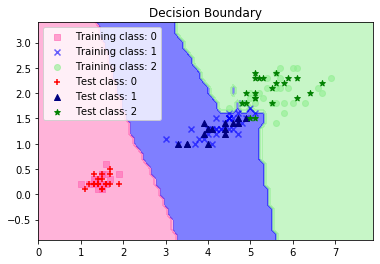

Training Accuracy 98.89%, with 89 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 2---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

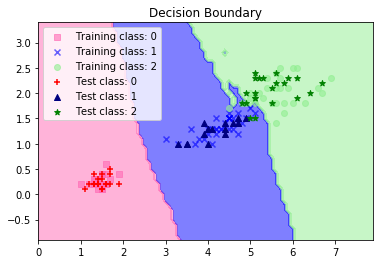

Training Accuracy 95.56%, with 86 out of  90 correctly classified.
Test Accuracy 93.33%, with 56 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 3---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

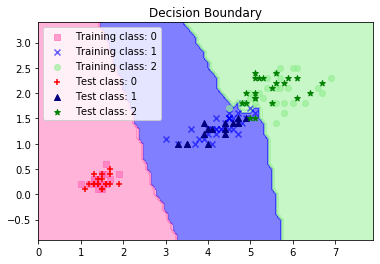

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 4---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

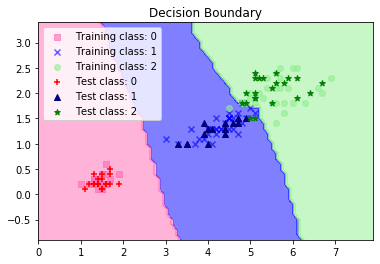

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 93.33%, with 56 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 5---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

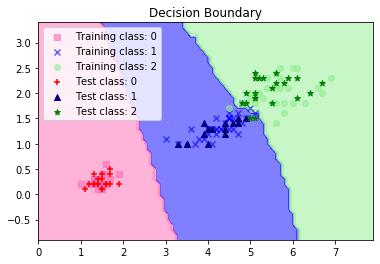

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 6---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

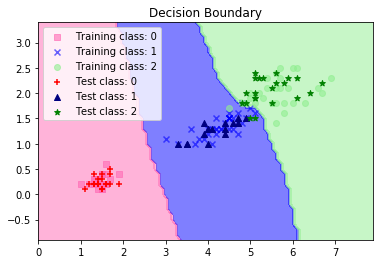

Training Accuracy 97.78%, with 88 out of  90 correctly classified.
Test Accuracy 95.00%, with 57 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 7---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

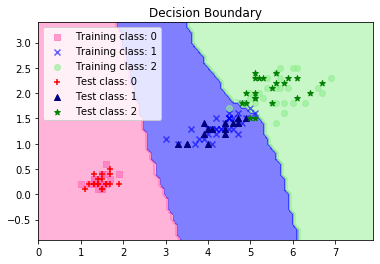

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 8---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

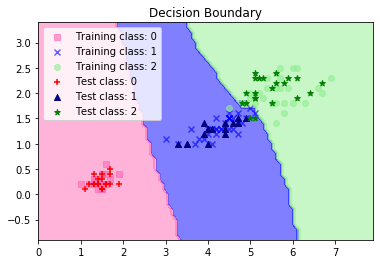

Training Accuracy 97.78%, with 88 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 9---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

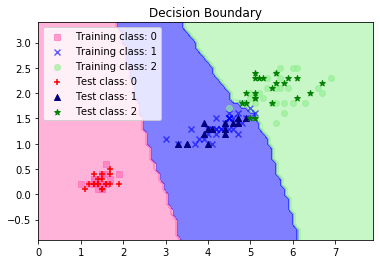

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 10---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

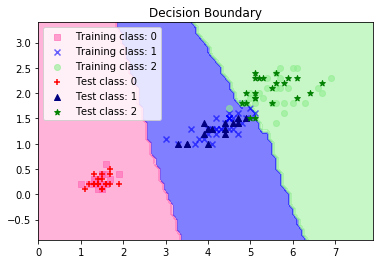

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 95.00%, with 57 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 11---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

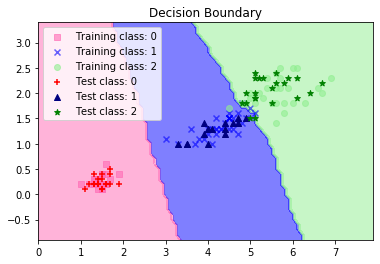

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 96.67%, with 58 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 12---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

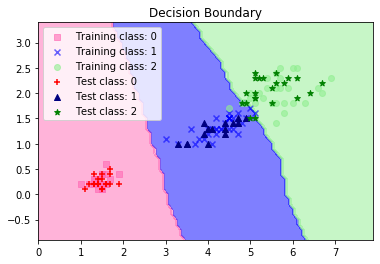

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 93.33%, with 56 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 13---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

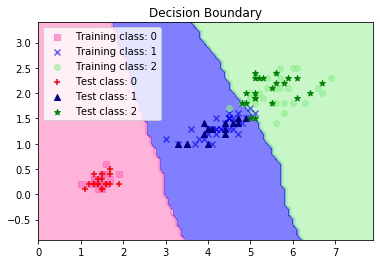

Training Accuracy 95.56%, with 86 out of  90 correctly classified.
Test Accuracy 95.00%, with 57 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 14---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

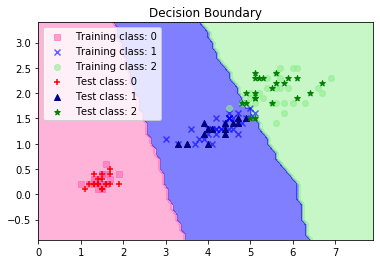

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 95.00%, with 57 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 15---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

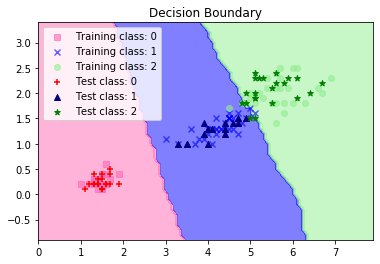

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 95.00%, with 57 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 16---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

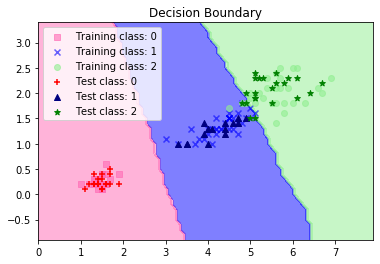

Training Accuracy 96.67%, with 87 out of  90 correctly classified.
Test Accuracy 93.33%, with 56 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 17---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

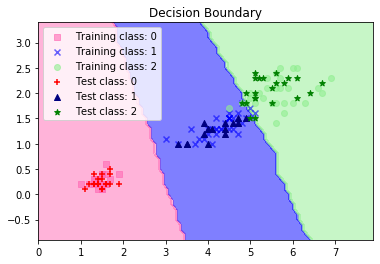

Training Accuracy 95.56%, with 86 out of  90 correctly classified.
Test Accuracy 93.33%, with 56 out of  60 correctly classified.
---------Decision Boundary for k-NN Classifier for k = 18---------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

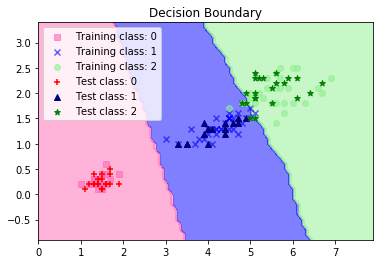

Training Accuracy 95.56%, with 86 out of  90 correctly classified.
Test Accuracy 93.33%, with 56 out of  60 correctly classified.


In [19]:
for k in range(1,19):
    print("---------Decision Boundary for k-NN Classifier for k = {}---------".format(k))
    kNN = kNN_Classifier(k,X_train,Y_train)
    plot_decisionBoundary(X_train,Y_train,kNN,X_test=X_test,Y_test=Y_test,save= False)

# Using the scikit-learn implementation for k-NN

In [21]:
k = 3
kNN = KNeighborsClassifier(n_neighbors = k,algorithm = 'brute',p = 2)
kNN.fit(X_train,Y_train)
preds_test = kNN.predict(X_test)

In [23]:
preds_train = kNN.predict(X_train)
preds_test = kNN.predict(X_test)
err_train = np.sum(preds_train != Y_train)
err_test = np.sum(preds_test != Y_test)
M = X_train.shape[0]
N = X_test.shape[0]
print("Training Accuracy {:.2f}%,with {} out of {} correctly calssified.".format((1-err_train/M)*100,M-err_train,M))
print("Test Accuracy {:.2f}%,with {} out of {} correctly calssified.".format((1-err_test/N)*100,N-err_test,N))

Training Accuracy 96.67%,with 87 out of 90 correctly calssified.
Test Accuracy 96.67%,with 58 out of 60 correctly calssified.


In [24]:
logreg = LogisticRegression(C = 1e5,solver = 'lbfgs',multi_class = 'multinomial',class_weight= {1:2})

In [25]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=100000.0, class_weight={1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [26]:
logreg.coef_

array([[ -9.48405217, -20.40252268],
       [  1.85858776,   4.29888693],
       [  7.62546441,  16.10363575]])

In [27]:
Y_pred = logreg.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.95

In [32]:
from sklearn import metrics
predict_y = logreg.predict(X_test)
print(metrics.classification_report(Y_test,predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.84      1.00      0.91        16
           2       1.00      0.86      0.93        22

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



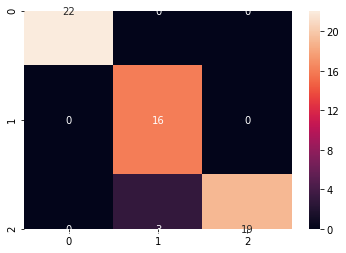

In [33]:
import seaborn as sns
colorMetrics = metrics.confusion_matrix(Y_test,predict_y)
sns.heatmap(colorMetrics,annot=True,fmt='d')

In [35]:
coef_df = pd.DataFrame(logreg.coef_,columns=data[0:2])
coef_df.round(2)

,5.1,4.9
,3.5,3.0
,1.4,1.4
,0.2,0.2
,Iris-setosa,Iris-setosa
0,-9.48,-20.4
1,1.86,4.3
2,7.63,16.1


In [36]:
coef_df["intercept"] = logreg.intercept_
coef_df.round(2)

,"(5.099999904632568, 3.5, 1.399999976158142, 0.20000000298023224, Iris-setosa)","(4.900000095367432, 3.0, 1.399999976158142, 0.20000000298023224, Iris-setosa)",intercept
0,-9.48,-20.4,50.03
1,1.86,4.3,-0.49
2,7.63,16.1,-49.54
